In [1]:
#BeautifulSoup
from bs4 import BeautifulSoup
import urllib
# from urllib.request import urlopen
# url = 'https://paikdabang.com/store/'
# page = urlopen(url)
# soup = BeautifulSoup(page, 'html.parser')
import time
#request

#selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
# Chrome Browser와 Chrome Driver Version 확인하기

chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
url = 'https://www.google.co.kr/imghp?hl=ko&ogbl'
driver.get('https://www.google.co.kr/imghp?hl=ko&ogbl') # 크롬열기

# selenium -> bs
time.sleep(3)
soup = BeautifulSoup(driver.page_source, "html.parser")

In [2]:
## url 이 아니라 이미지인 경우 base64 디코딩 

import base64
import io
from PIL import Image
import cv2
import numpy as np 
       # Take in base64 string and return cv image
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    dataBytesIO = io.BytesIO(imgdata)
    image = Image.open(dataBytesIO)
    # return np.array(image)
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)

In [3]:
#셀레니움 스크롤 끝까지 내려도 계속 내리는 페이지라면

def scroll_down_until_end(driver):
    prev_height = driver.execute_script("return document. body.scrollHeight")
    import time
    while True:
        #첫번째로 스크롤 내리기
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

        #시간대기
        time.sleep(2)

        #현재높이 저장
        current_height = driver.execute_script("return document. body.scrollHeight")

        #현재높이와 끝의 높이가 끝이면 탈출
        if current_height == prev_height:
            break
        #업데이트해줘서 끝낼 수 있도록
        prev_height = current_height

In [4]:
#class gLFyf
soup.find_all('textarea')

[<textarea aria-label="검색" autocapitalize="off" autocomplete="off" autocorrect="off" autofocus="" class="gLFyf" data-ved="0ahUKEwiVodyUr57-AhWgqFYBHc4_CQIQ39UDCAM" id="APjFqb" jsaction="paste:puy29d;" maxlength="2048" name="q" role="combobox" rows="1" spellcheck="false" title="검색" type="search" value=""></textarea>,
 <textarea class="csi" name="csi" style="display:none"></textarea>]

In [5]:
soup.find_all('input')

[<input name="hl" type="hidden" value="ko"/>,
 <input name="tbm" type="hidden" value="isch"/>,
 <input name="source" type="hidden" value="hp"/>,
 <input name="biw" type="hidden" value="865"/>,
 <input name="bih" type="hidden" value="862"/>,
 <input name="ei" type="hidden" value="A4IzZNWTE6DR2roPzv-kEA"/>,
 <input name="iflsig" type="hidden" value="AOEireoAAAAAZDOQE99KhswCKWRH0QeaxygW8FP5dtQA"/>]

In [6]:

soup = BeautifulSoup(driver.page_source, "html.parser")

In [7]:
time.sleep(0.1)

# keyword = 'gas torch flame'
keyword = 'red led warning light'
keyword_en = 'red_led_warning_light'
length = soup.find_all('textarea')
if (len(length) >= 1):
    try:
        if length[0]['aria-label'] == '검색': 
            cls = soup.find('textarea')['class'][0]
    except:
        cls = soup.find('input')['class'][0]

else:
    cls = soup.find('input')['class'][0]
# xpath = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input'
driver.find_element(By.CLASS_NAME, cls).send_keys(keyword)

xpath = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button'
driver.find_element(By.XPATH, xpath).click()




In [8]:
length[0]

<textarea aria-label="검색" autocapitalize="off" autocomplete="off" autocorrect="off" autofocus="" class="gLFyf" data-ved="0ahUKEwiVodyUr57-AhWgqFYBHc4_CQIQ39UDCAM" id="APjFqb" jsaction="paste:puy29d;" maxlength="2048" name="q" role="combobox" rows="1" spellcheck="false" title="검색" type="search" value=""></textarea>

In [9]:
soup.find_all('input')

[<input name="hl" type="hidden" value="ko"/>,
 <input name="tbm" type="hidden" value="isch"/>,
 <input name="source" type="hidden" value="hp"/>,
 <input name="biw" type="hidden" value="865"/>,
 <input name="bih" type="hidden" value="862"/>,
 <input name="ei" type="hidden" value="A4IzZNWTE6DR2roPzv-kEA"/>,
 <input name="iflsig" type="hidden" value="AOEireoAAAAAZDOQE99KhswCKWRH0QeaxygW8FP5dtQA"/>]

In [10]:
soup.find('input')

<input name="hl" type="hidden" value="ko"/>

In [11]:
scroll_down_until_end(driver)
soup = BeautifulSoup(driver.page_source, "html.parser")
cls = 'mye4qd'
soup.find('input',cls)['value'] == '결과 더보기'
driver.find_element(By.CLASS_NAME, cls).click()
scroll_down_until_end(driver)

if soup.select('div.OuJzKb.Yu2Dnd > div')[0].text == '더 이상 표시할 콘텐츠가 없습니다.':
    print('end')



end


In [12]:

selector = '#islrg > div.islrc > div  a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img'

imgs= soup.select(selector)


In [13]:
print(len(imgs))

398


<img alt="재충전용 LED 소통량 배턴 형광성 지팡이 빛 지팡이 경고 지팡이 - 중국 소통량 배턴, 소통량 지팡이" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="604.5" height="180" jsname="Q4LuWd" src="" width="180"/>
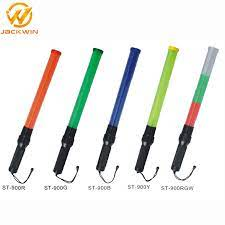

In [14]:
imgs[0]

In [15]:
import os
# dirname = keyword.replace(' ', '_')
dirname = f'/media/tekim/DATA/Dataset/화재 발생 예측 영상/{keyword}'
if not os.path.exists(dirname):
    os.mkdir(dirname)

for j,i in enumerate(imgs):
    try:
        if i['src'][:4] == 'data':
            imgurl = i['src'].split('base64,')[1] # get thumnails address list
            img = stringToRGB(imgurl)
            cv2.imwrite(img=img,filename=f"{dirname}/"+f'{keyword_en}' +'_' + str(j+1)+".jpg")
        else:
            imgurl = i['src']
            urllib.request.urlretrieve(imgurl,f"{dirname}/"+f'{keyword_en}' +'_' + str(j+1)+".jpg") # download images in address folder
            time.sleep(0.2)
    except:
        continue
        

In [16]:
for j,i in enumerate(imgs):
    if j == 285:
        print(i)
    

<img alt="Nightstick Traffic Wands" class="rg_i Q4LuWd" data-ils="4" height="201" jsaction="rcuQ6b:trigger.M8vzZb;" jsname="Q4LuWd" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXPpYI8QCBF7yvxXehlzjzTT34CXYxlBweKQ&amp;usqp=CAU" width="201"/>


In [17]:
for i in imgs:
    if i['src'][:4] == 'data':
        continue
    else:
        print(i)
        break

<img alt="Cyalume Traffic Light Baton Handle (Pack of 4) | Cyalume Technologies" class="rg_i Q4LuWd" data-ils="4" height="206" jsaction="rcuQ6b:trigger.M8vzZb;" jsname="Q4LuWd" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1GqtwGeBWWTIa1K65KZPm_ycp-pkUOXPrcQ&amp;usqp=CAU" width="206"/>


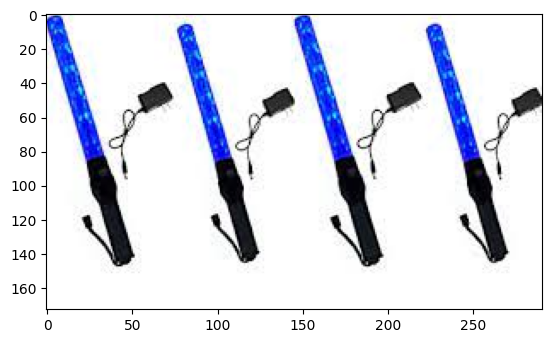

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img)